<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bereket\AppData\Local\Temp\ipykernel_18544\882539264.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['price_val'] = df['price'].str.extract('(\d+)').fillna(0).astype(float)
C:\Users\bereket\AppData\Local\Temp\ipykernel_18544\882539264.py:13: SyntaxWarning: invalid escape sequence '\d'
  df['pos_ratio'] = df['positive_ratio'].str.extract('(\d+)').fillna(0).astype(float)


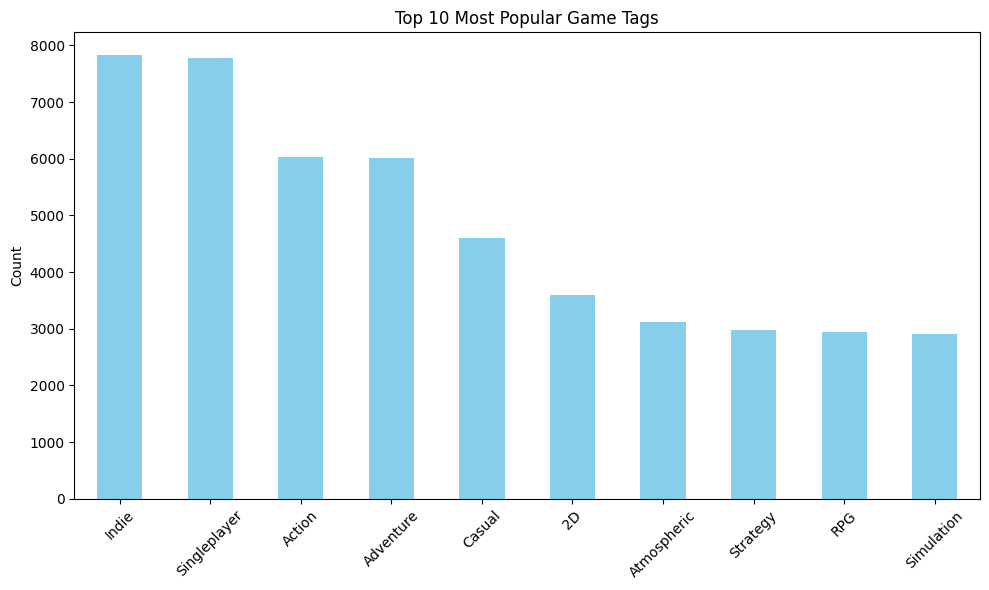

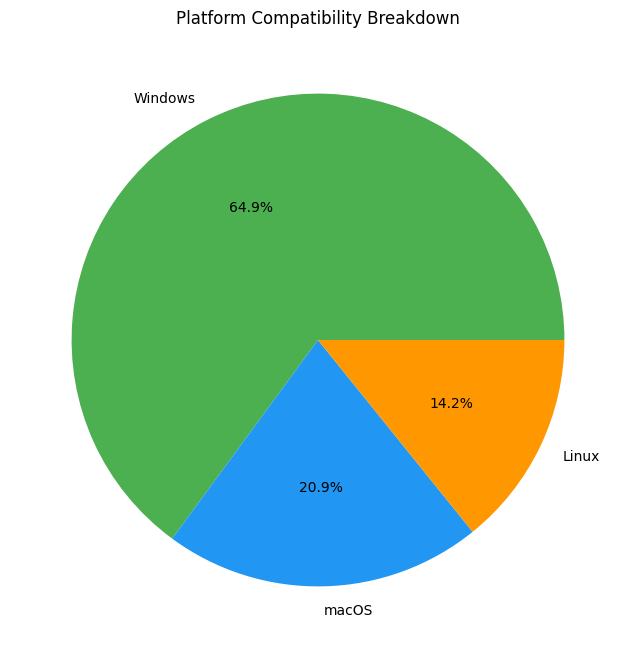

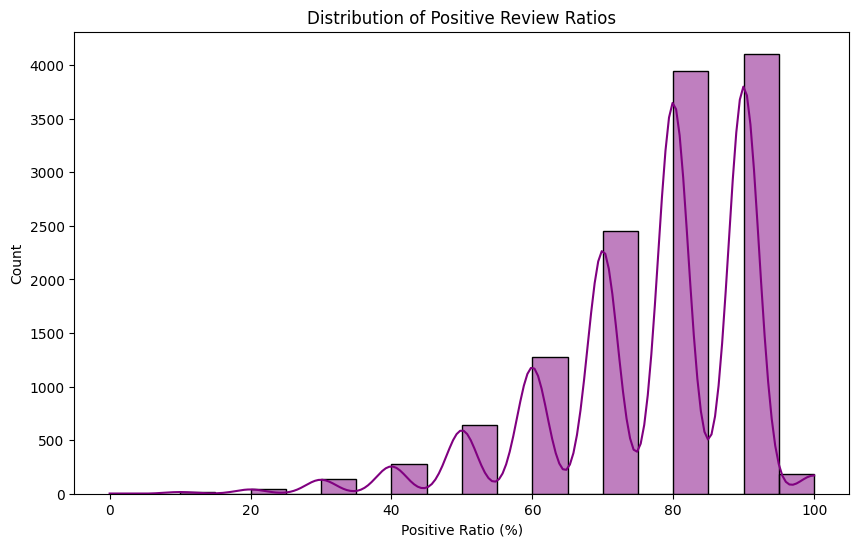

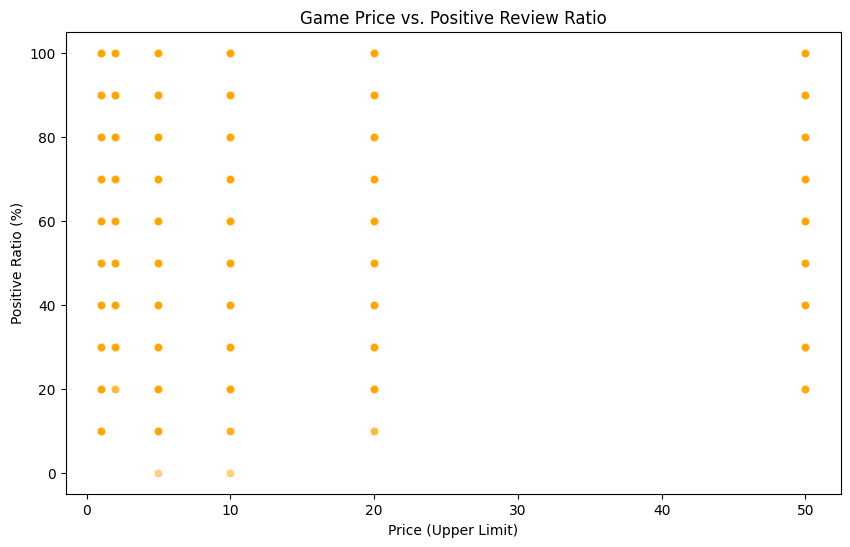

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('games.csv')

# Cleanup columns
df['win_bool'] = df['win'].apply(lambda x: 1 if 'True' in str(x) else 0)
df['mac_bool'] = df['mac'].apply(lambda x: 1 if 'True' in str(x) else 0)
df['linux_bool'] = df['linux'].apply(lambda x: 1 if 'True' in str(x) else 0)
df['price_val'] = df['price'].str.extract('(\d+)').fillna(0).astype(float)
df['pos_ratio'] = df['positive_ratio'].str.extract('(\d+)').fillna(0).astype(float)

# 1. Bar Chart: Top 10 Tags
all_tags = []
df['tags'].fillna('').apply(lambda x: all_tags.extend([i.strip() for i in x.split(',') if i.strip()]))
tag_counts = pd.Series(all_tags).value_counts().head(10)

plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Game Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_tags.png')

# 2. Pie Chart: Platform Support
platforms = ['Windows', 'macOS', 'Linux']
counts = [df['win_bool'].sum(), df['mac_bool'].sum(), df['linux_bool'].sum()]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=platforms, autopct='%1.1f%%', colors=['#4CAF50', '#2196F3', '#FF9800'])
plt.title('Platform Compatibility Breakdown')
plt.savefig('platform_pie.png')

# 3. Histogram: Positive Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['pos_ratio'], bins=20, kde=True, color='purple')
plt.title('Distribution of Positive Review Ratios')
plt.xlabel('Positive Ratio (%)')
plt.savefig('pos_ratio_hist.png')

# 4. Scatter Plot: Price vs. Positive Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_val', y='pos_ratio', data=df, alpha=0.5, color='orange')
plt.title('Game Price vs. Positive Review Ratio')
plt.xlabel('Price (Upper Limit)')
plt.ylabel('Positive Ratio (%)')
plt.savefig('price_vs_ratio_scatter.png')

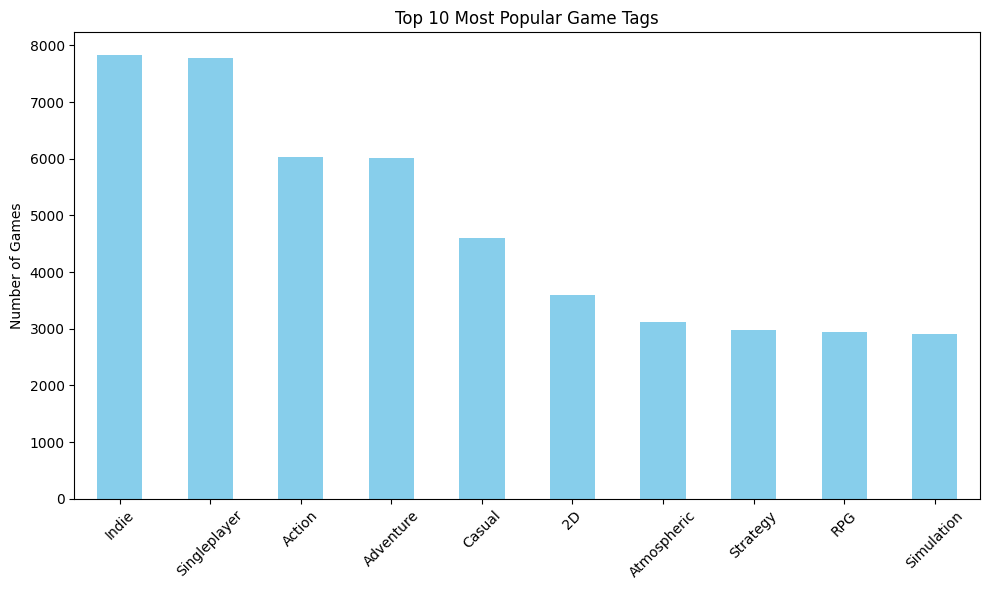

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games.csv')

# Extract and count all tags
all_tags = []
df['tags'].fillna('').apply(lambda x: all_tags.extend([i.strip() for i in x.split(',') if i.strip()]))
tag_counts = pd.Series(all_tags).value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Game Tags')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_tags.png')

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bereket\AppData\Local\Temp\ipykernel_18544\1358690050.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['pos_ratio'] = df['positive_ratio'].str.extract('(\d+)').astype(float)


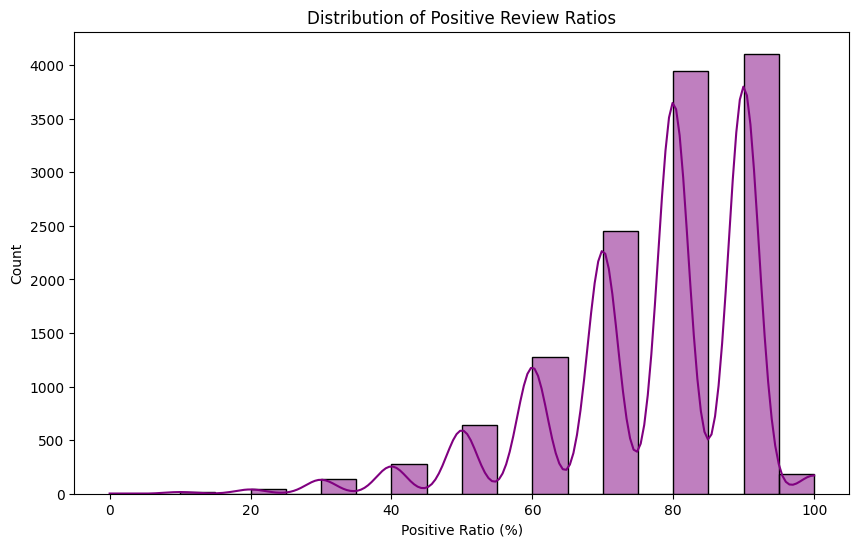

In [3]:
import seaborn as sns

# Clean the positive ratio column to numbers
df['pos_ratio'] = df['positive_ratio'].str.extract('(\d+)').astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['pos_ratio'], bins=20, kde=True, color='purple')
plt.title('Distribution of Positive Review Ratios')
plt.xlabel('Positive Ratio (%)')
plt.savefig('pos_ratio_hist.png')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bereket\AppData\Local\Temp\ipykernel_18544\2781475162.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['price_val'] = df['price'].str.extract('(\d+)').fillna(0).astype(float)


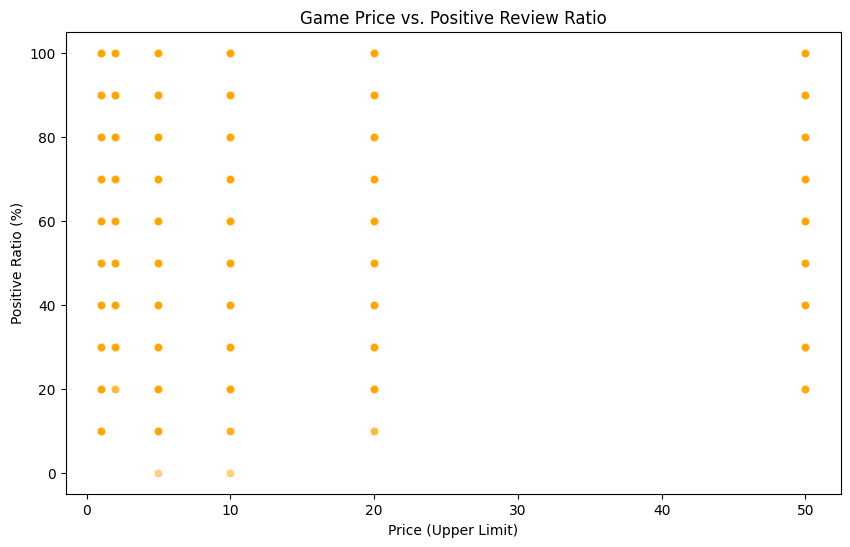

In [4]:
# Clean price to numbers
df['price_val'] = df['price'].str.extract('(\d+)').fillna(0).astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_val', y='pos_ratio', data=df, alpha=0.5, color='orange')
plt.title('Game Price vs. Positive Review Ratio')
plt.xlabel('Price (Upper Limit)')
plt.ylabel('Positive Ratio (%)')
plt.savefig('price_vs_ratio_scatter.png')

In [ ]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load Data
df = pd.read_csv('games.csv')

# 2. Data Transformation (Cleaning & Numerical Mapping)
# Map text ratings to numbers 1-9
rating_map = {
    'Overwhelmingly Positive': 9, 'Very Positive': 8, 'Positive': 7, 
    'Mostly Positive': 6, 'Mixed': 5, 'Mostly Negative': 4, 
    'Negative': 3, 'Very Negative': 2, 'Overwhelmingly Negative': 1
}
df['rating_score'] = df['rating'].map(rating_map).fillna(5)

# Extract price numbers (e.g., 'price<10' -> 10)
df['price_num'] = df['price'].str.extract('(\d+)').fillna(0).astype(float)

# Convert platform text to binary (0 or 1)
for col in ['win', 'mac', 'linux']:
    df[col + '_bool'] = df[col].apply(lambda x: 1 if 'True' in str(x) else 0)

# 3. Create Feature "Soup" for the Model
# We combine title and tags to create a descriptive text for each game
df['tags'] = df['tags'].fillna('')
df['metadata'] = df['title'] + " " + df['tags'].str.replace(',', ' ')

# 4. Train the Model (Vectorization & Similarity)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['metadata'])

# Calculate how similar every game is to every other game
similarity = cosine_similarity(tfidf_matrix)

# 5. Save the Final Files
# We save the cleaned DataFrame and the similarity matrix
pickle.dump(df, open('games_list.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))

print(" Success! Final model and data saved.")
print(f"Total games processed: {len(df)}")

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bereket\AppData\Local\Temp\ipykernel_18544\4154612481.py:19: SyntaxWarning: invalid escape sequence '\d'
  df['price_num'] = df['price'].str.extract('(\d+)').fillna(0).astype(float)


✅ Success! Final model and data saved.
Total games processed: 13078


In [ ]:
def check_precision(game_title):
    idx = df[df['title'] == game_title].index[0]
    distances = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])
    
    hits = 0
    for i in distances[1:6]:
        if df.iloc[i[0]].rating_score >= 7: # 7 is "Positive"
            hits += 1
            
    precision = (hits / 5) * 100
    print(f"Precision Score: {precision}% (Percentage of high-rated recommendations)")

check_precision("Among Us")

Precision Score: 60.0% (Percentage of high-rated recommendations)


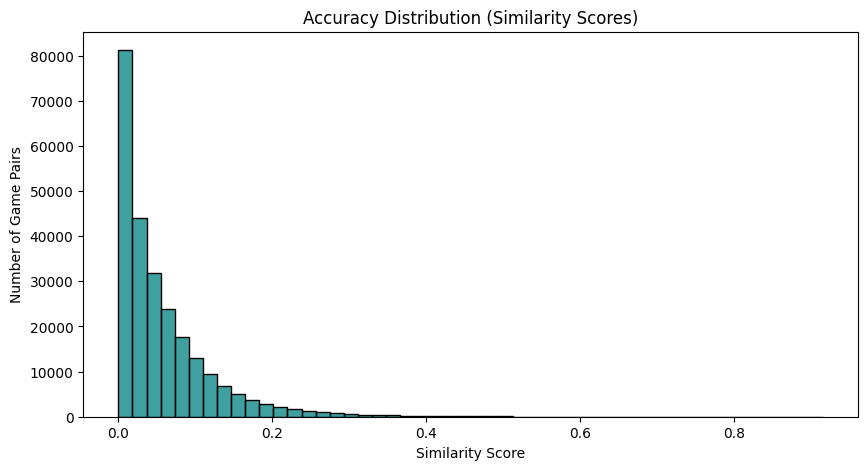

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take a sample of similarity scores
sample = similarity[:500, :500].flatten()

plt.figure(figsize=(10, 5))
sns.histplot(sample[sample < 0.98], bins=50, color='teal') # Ignore 1.0 (self-similarity)
plt.title('Accuracy Distribution (Similarity Scores)')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Game Pairs')
plt.show()

In [8]:
def check_confidence(game_title):
    idx = df[df['title'] == game_title].index[0]
    # Get scores of top 5 recommendations
    scores = sorted(similarity[idx], reverse=True)[1:6]
    
    avg_accuracy = sum(scores) / len(scores)
    print(f"Model Confidence for {game_title}: {avg_accuracy:.2%}")

# Example usage:
check_confidence("Call of Duty®")

Model Confidence for Call of Duty®: 67.42%
